In [1]:
import networkx as nx
import pandas as pd

from itertools import count

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nodes_df = pd.read_csv('nodes3.csv')
edges_df = pd.read_csv('edge1.csv')
trust_df = edges_df[edges_df[':TYPE']=='trust']
distrust_df = edges_df[edges_df[':TYPE']=='distrust']

## Trust

Harmonic centrality on trust graph

In [3]:
G = nx.DiGraph()
for _, node in nodes_df.iterrows():
    G.add_node(node['org_ID:ID'], label=node['name'])
for _, edge in trust_df.iterrows():
    G.add_edge(edge['start_ID:START_ID'], edge['end_ID:END_ID'])
G_trust = G

/usr/lib/python3.7/site-packages/networkx/drawing/layout.py:923: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  pos = np.row_stack((pos[x] for x in node_list))
/usr/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/usr/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


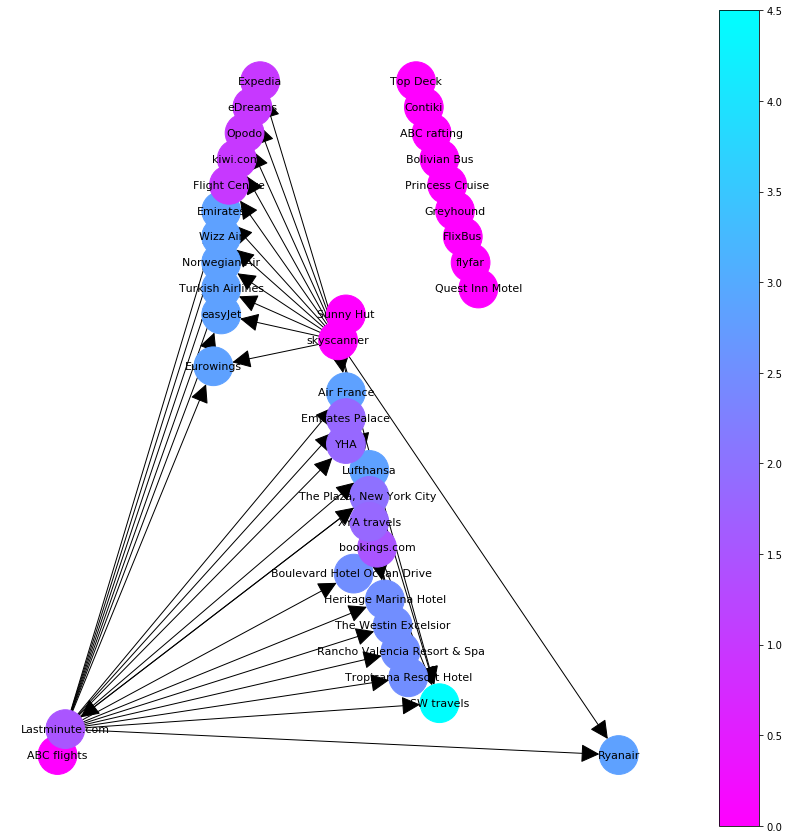

In [4]:
plt.figure(figsize=(15,15))
trust_centrality = list(nx.algorithms.harmonic_centrality(G).values())
pos = nx.planar_layout(G)
nsize = 1500
n_plt = nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), node_color=trust_centrality, 
                            with_labels=True, node_size=nsize, cmap=plt.cm.cool.reversed())
e_plt = nx.draw_networkx_edges(G, pos, node_size=nsize, arrows=True, arrowstyle='-|>', arrowsize=40)
l_plt = nx.draw_networkx_labels(G, pos, labels=dict(G.nodes.data('label')), font_size=11, font_color='#000000')
plt.colorbar(n_plt)
plt.axis('off')
plt.show()

## Distrust

Harmonic centrality on distrust graph

In [5]:
G = nx.DiGraph()
for _, node in nodes_df.iterrows():
    G.add_node(node['org_ID:ID'], label=node['name'])
for _, edge in distrust_df.iterrows():
    G.add_edge(edge['start_ID:START_ID'], edge['end_ID:END_ID'])
G_distrust = G

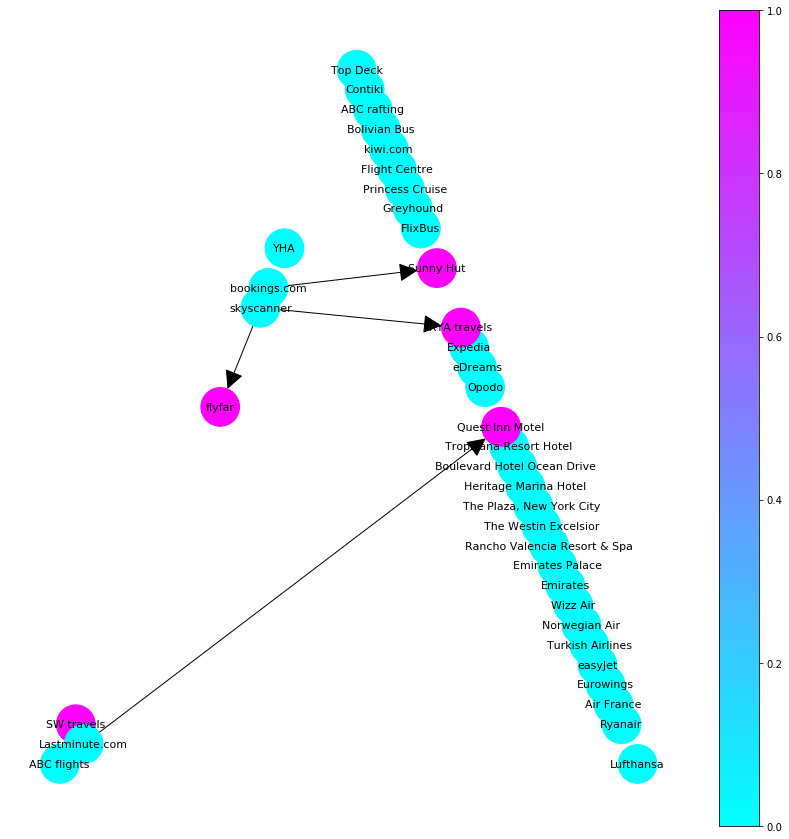

In [6]:
plt.figure(figsize=(15,15))
distrust_centrality = list(nx.algorithms.harmonic_centrality(G).values())
pos = nx.planar_layout(G)
nsize = 1500
n_plt = nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), node_color=distrust_centrality, 
                            with_labels=True, node_size=nsize, cmap=plt.cm.cool)
e_plt = nx.draw_networkx_edges(G, pos, node_size=nsize, arrows=True, arrowstyle='-|>', arrowsize=40)
l_plt = nx.draw_networkx_labels(G, pos, labels=dict(G.nodes.data('label')), font_size=11, font_color='#000000')
plt.colorbar(n_plt)
plt.axis('off')
plt.show()

## Aggregated view

In [7]:
scores = pd.DataFrame(columns=('Name', 'Trust', 'Distrust'))
for i, (_, node) in enumerate(G.nodes(data=True)):
    scores.loc[i] = [node['label'], trust_centrality[i], distrust_centrality[i]]
scores = scores.sort_values(by=['Trust', 'Distrust'])

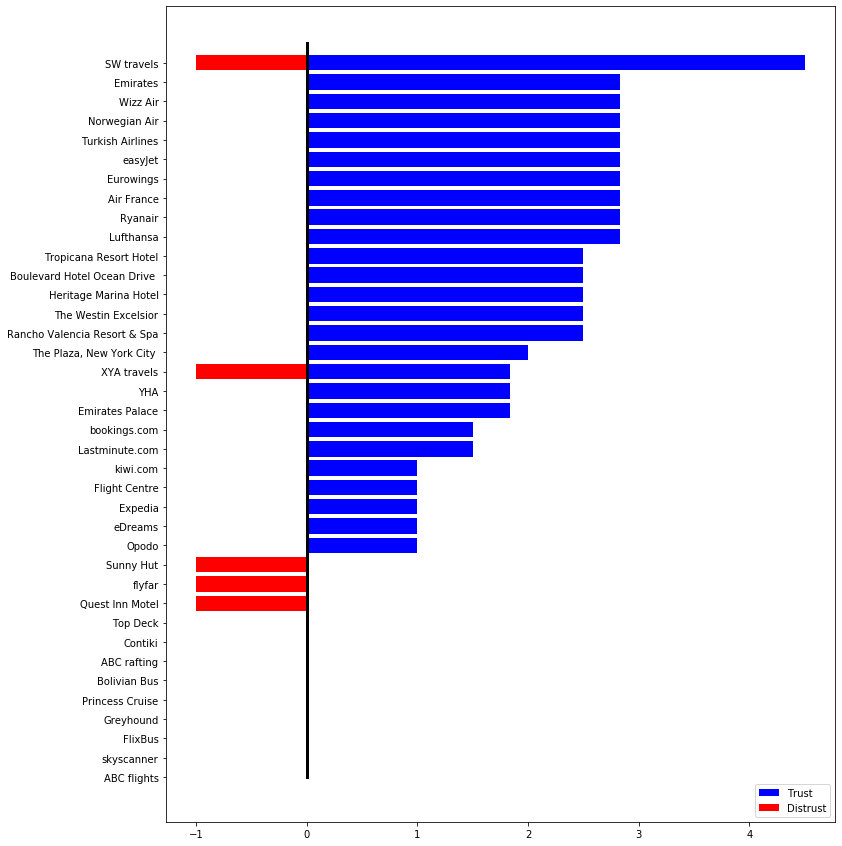

In [8]:
plt.style.use('seaborn-bright')
fig, ax = plt.subplots(figsize=(12,15))
trust_bar = ax.barh(range(len(scores)), scores['Trust'],
                    label='Trust', color='blue', tick_label=scores['Name'])
distrust_bar = ax.barh(range(len(scores)), -scores['Distrust'],
                       label='Distrust', color='red', tick_label=scores['Name'])
vline = ax.plot([0, 0], [0, len(scores)], color='black', lw=3)
_ = ax.legend((trust_bar[0],distrust_bar[0]),('Trust','Distrust'), loc='lower right')